<a href="https://colab.research.google.com/github/xmuhammadaziz09/Deeplearning-3/blob/main/Tugas3_Multilabel_Classification_Muhammad_Aziz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
import keras
from keras.applications import MobileNetV2
from keras.models import Model
from keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
import os
os.environ["KAGGLE_USERNAME"] = "muhammadziin"
os.environ["KAGGLE_KEY"] = "6ae1b4a90f8d15b71e2f8c955704b314"

In [4]:
!kaggle datasets download -d muhammadziin/datasetmultilabe-muhammad-aziz-202255202017-hobby

Dataset URL: https://www.kaggle.com/datasets/muhammadziin/datasetmultilabe-muhammad-aziz-202255202017-hobby
License(s): unknown


In [5]:
# prompt: unzip file movie-classifier.zip

!unzip datasetmultilabe-muhammad-aziz-202255202017-hobby.zip

Archive:  datasetmultilabe-muhammad-aziz-202255202017-hobby.zip
  inflating: DatasetMultilabel_Muhammad Aziz_202255202017/Gambar001.jpg  
  inflating: DatasetMultilabel_Muhammad Aziz_202255202017/Gambar002.jpg  
  inflating: DatasetMultilabel_Muhammad Aziz_202255202017/Gambar003.jpg  
  inflating: DatasetMultilabel_Muhammad Aziz_202255202017/Gambar004.jpg  
  inflating: DatasetMultilabel_Muhammad Aziz_202255202017/Gambar005.jpg  
  inflating: DatasetMultilabel_Muhammad Aziz_202255202017/Gambar006.jpg  
  inflating: DatasetMultilabel_Muhammad Aziz_202255202017/Gambar007.jpg  
  inflating: DatasetMultilabel_Muhammad Aziz_202255202017/Gambar008.jpg  
  inflating: DatasetMultilabel_Muhammad Aziz_202255202017/Gambar009.jpg  
  inflating: DatasetMultilabel_Muhammad Aziz_202255202017/Gambar010.jpg  
  inflating: DatasetMultilabel_Muhammad Aziz_202255202017/Gambar011.jpg  
  inflating: DatasetMultilabel_Muhammad Aziz_202255202017/Gambar012.jpg  
  inflating: DatasetMultilabel_Muhammad Aziz_202

In [6]:
# Baca file CSV dengan delimiter yang sesuai
df = pd.read_csv('/content/traindataset_Muhammad Aziz_202255202017.csv', delimiter=';')

# Tampilkan 5 baris pertama dengan format tabel
display(df.head())  # Gunakan display() jika di Jupyter/Colab

,"Id,Object,Nswitch,Gundam,TWS,Buku Komik"
0,"Gambar001,""['Nswitch','TWS','Buku Komik']"",1,0..."
1,"Gambar002,""['Nswitch','Gundam']"",1,1,0,0"
2,"Gambar003,""['Nswitch','TWS','Buku Komik']"",1,0..."
3,"Gambar004,""['Nswitch','Gundam']"",1,1,0,0"
4,"Gambar005,""['Nswitch','TWS','Buku Komik']"",1,0..."


In [7]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tqdm import tqdm
import os
import pandas as pd

# Baca CSV dengan benar
df = pd.read_csv('/content/traindataset_Muhammad Aziz_202255202017.csv', sep=',', engine='python')
print(df.columns)  # Harusnya muncul: ['Id', 'Object', 'Nswitch', 'Gundam', 'TWS', 'Buku Komik']

SIZE = 224
X_dataset = []

# Update the image_directory to the correct path
image_directory = '/content/DatasetMultilabel_Muhammad Aziz_202255202017'
column_name = 'Id'

for i in tqdm(range(df.shape[0])):
    filename = df[column_name][i] + '.jpg'  # Change '.HEIC' to '.jpg' if images are in JPG format
    img_path = os.path.join(image_directory, filename)

    # Check if the file exists before trying to load it
    if os.path.exists(img_path):
        img = image.load_img(img_path, target_size=(SIZE, SIZE, 3))
        img = image.img_to_array(img)
        img = img / 255.
        X_dataset.append(img)
    else:
        print(f"Warning: File not found: {img_path}")

X = np.array(X_dataset)

Index(['Id', 'Object', 'Nswitch', 'Gundam', 'TWS', 'Buku Komik'], dtype='object')


100%|██████████| 300/300 [00:40<00:00,  7.41it/s]


In [8]:
#
print(df['Id'][250])

Gambar251


In [9]:
print(df['Object'][250])  #Tagged as multiple Object.

['Nswitch','Gundam','TWS','Buku Komik']


In [10]:
#Id and Object are not labels to be trained. So drop them from the dataframe.
#No need to convert to categorical as the dataset is already in the right format.
y = np.array(df.drop(['Id', 'Object'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.3)

In [11]:
# Ganti SIZE dengan ukuran input gambar (contoh: 224)
SIZE = 224

# Load MobileNetV2 tanpa top classifier
base_model = MobileNetV2(input_shape=(SIZE, SIZE, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Bekukan weight pre-trained untuk transfer learning awal

# Instead of creating a new model, use the base_model as the starting point
# and add layers on top of it using the Functional API.
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='sigmoid')(x)  # Untuk multilabel classification

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,430,468 (9.27 MB)

 Trainable params: 172,484 (673.77 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [12]:
from tensorflow.keras.metrics import AUC

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[AUC(name='auc')])

In [13]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - auc: 0.5348 - loss: 0.7202 - val_auc: 0.7914 - val_loss: 0.5026
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - auc: 0.6229 - loss: 0.6222 - val_auc: 0.8180 - val_loss: 0.4764
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - auc: 0.6992 - loss: 0.5444 - val_auc: 0.8697 - val_loss: 0.4436
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - auc: 0.7539 - loss: 0.5100 - val_auc: 0.8673 - val_loss: 0.4192
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - auc: 0.7728 - loss: 0.4737 - val_auc: 0.9066 - val_loss: 0.3816
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - auc: 0.8405 - loss: 0.4086 - val_auc: 0.9079 - val_loss: 0.3655
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - auc: 0.8368 - loss: 0.4160 - val_auc: 0.9105 - val_loss: 0.3545
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - auc: 0.8267 - loss: 0.4425 - val_auc: 0.9163 - val_loss: 0.3380
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - auc: 0.8418 - loss: 0.4097 - val_auc: 

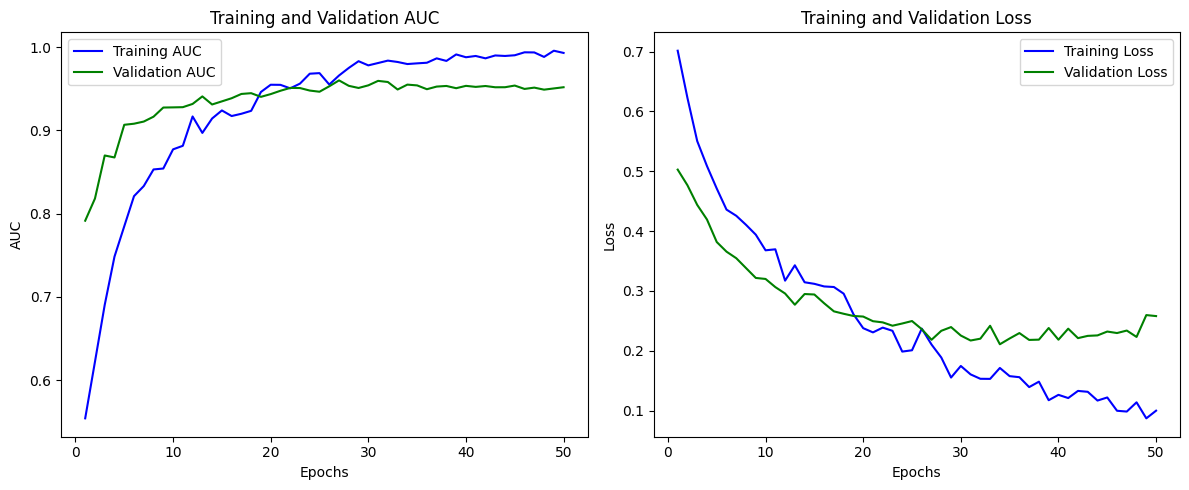

In [14]:
import matplotlib.pyplot as plt

# Ambil nilai AUC dan Loss dari riwayat training
auc = history.history['auc']
val_auc = history.history['val_auc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(auc) + 1)

# Plot AUC
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, auc, 'b', label='Training AUC')
plt.plot(epochs, val_auc, 'g', label='Validation AUC')
plt.title('Training and Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


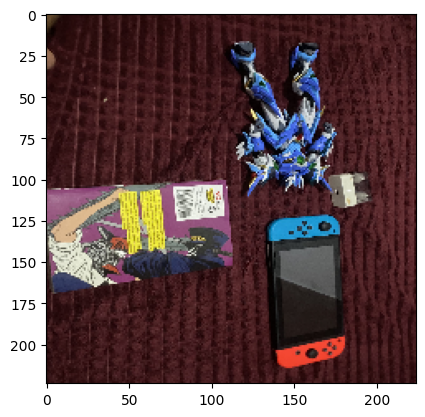

In [15]:
#Gambar yang diprediksi
img = image.load_img('/content/DatasetMultilabel_Muhammad Aziz_202255202017/Gambar117.jpg', target_size=(SIZE,SIZE,3))

img = image.img_to_array(img)
img = img/255.
plt.imshow(img)
img = np.expand_dims(img, axis=0)

classes = np.array(df.columns[2:]) #Get array of all classes
proba = model.predict(img)  #Get probabilities for each class
sorted_categories = np.argsort(proba[0])[:-11:-1]  #Get class names for top 10 categories

In [16]:
#Print classes and corresponding probabilities
for i in range(4):
    print("{}".format(classes[sorted_categories[i]])+" ({:.3})".format(proba[0][sorted_categories[i]]))

Buku Komik (1.0)
TWS (0.998)
Gundam (0.994)
Nswitch (0.987)


In [17]:
###################################################

loss, auc = model.evaluate(X_test, y_test)
print("AUC = ", (auc * 100.0), "%")

###################################################

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - auc: 0.9611 - loss: 0.2342
AUC =  95.16985416412354 %


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
              precision    recall  f1-score   support

     Nswitch       1.00      0.96      0.98        71
      Gundam       1.00      1.00      1.00        71
         TWS       0.81      0.97      0.88        58
  Buku Komik       0.95      0.97      0.96        77

   micro avg       0.94      0.97      0.96       277
   macro avg       0.94      0.97      0.96       277
weighted avg       0.95      0.97      0.96       277
 samples avg       0.94      0.97      0.95       277



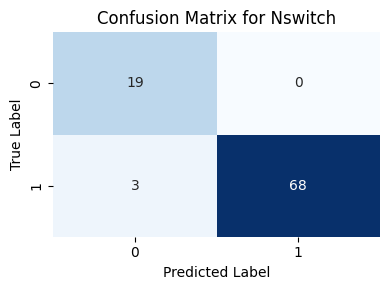

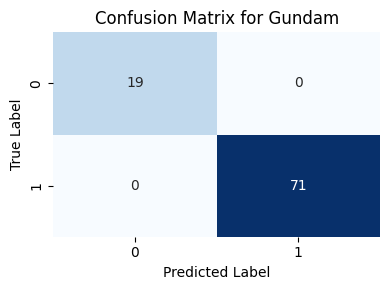

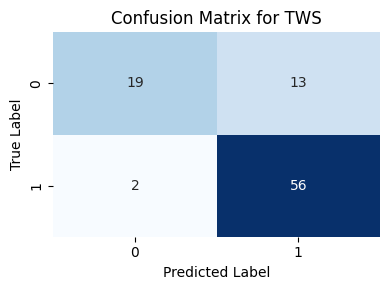

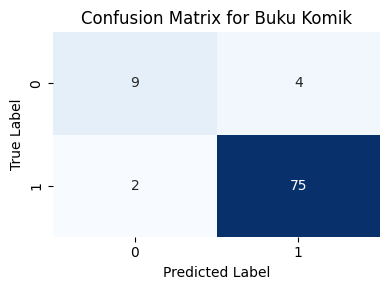

In [18]:
# Prediksi
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Laporan klasifikasi
print(classification_report(y_test, y_pred_classes, target_names=classes))

# Visualisasi confusion matrix untuk setiap label
for i in range(len(classes)):
    cm = confusion_matrix(y_test[:, i], y_pred_classes[:, i])

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {classes[i]}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()
